In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import GPy
#import seaborn as sns

In [3]:
con = r'C:\Users\Kamanda\Desktop\RECI\concatcon.csv'
df = pd.read_csv(con, parse_dates = ['Date'])
print df.head(3)
print df.shape
aqi = df['Aqi']
date=df['Date']
pm=df['Concentration']
ids=df['Id']

   Id       Date     Time        x          y  Concentration       Aqi  \
0   0 2017-04-24  6:09:18  0.35769  32.584449         872.50  5.668984   
1   1 2017-04-24  6:09:18  0.35769  32.584449        1151.68  7.482929   
2   2 2017-04-24  6:09:18  0.35769  32.584449         534.56  3.473252   

       comment  
0  AQI_IS_GOOD  
1  AQI_IS_GOOD  
2  AQI_IS_GOOD  
(1062, 8)


 C:\Users\Kamanda\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x96d8790>],
 'caps': [<matplotlib.lines.Line2D at 0x96d8f30>,
 'fliers': [<matplotlib.lines.Line2D at 0x96e58d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x96d8510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x96d8870>,
  <matplotlib.lines.Line2D at 0x96d8bf0>]}

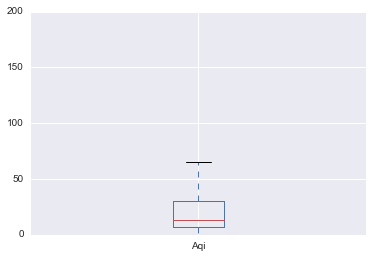

In [8]:
df.boxplot(column='Aqi')

 C:\Users\Kamanda\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x84bfd50>],
 'caps': [<matplotlib.lines.Line2D at 0x8663530>,
 'fliers': [<matplotlib.lines.Line2D at 0x8663ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x8663bf0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x84bfe30>,
  <matplotlib.lines.Line2D at 0x86631f0>]}

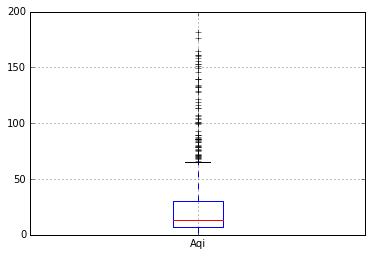

In [3]:
df.boxplot(column='Aqi')

In [4]:
df['Aqi'].count()

1062

In [5]:
df['comment'].value_counts()

AQI_IS_GOOD                            930
AQI_is_MODERATE                         99
AQI_is_UNHEALTHY_FOR_SENSITVE_GROUP     21
AQI_is_UNHEALTHY                        12
Name: comment, dtype: int64

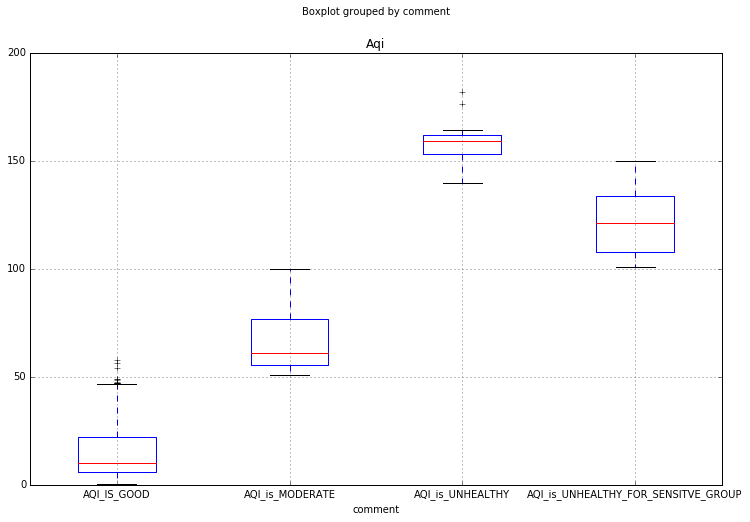

In [6]:
df.boxplot(column='Aqi',by='comment',figsize=(12,8))

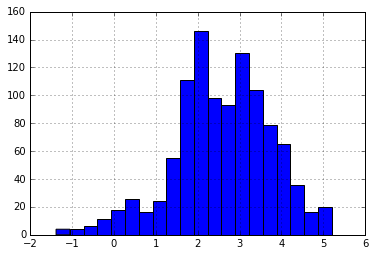

In [7]:
df['Aqi_log'] = np.log(df['Aqi'])
df['Aqi_log'].hist(bins=20)

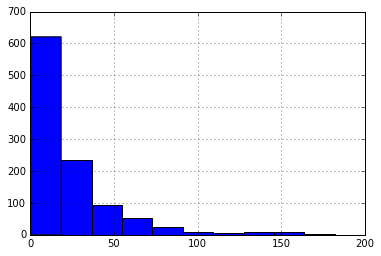

In [8]:
df['Aqi'].hist(bins=10)

In [9]:
data = pd.DataFrame({'TIMESTAMP': df['Date'],
                     'TYPE':df['Aqi'] })
#print data.head()
#PRINT Dailly average data
daily = data.set_index('TIMESTAMP').groupby(pd.TimeGrouper(freq='D'))['TYPE'].mean()
monthly = daily.groupby(pd.TimeGrouper(freq='D')).mean()
monthlys = monthly.dropna(axis=0)
print monthlys
print monthlys.mean()
print monthlys.shape

TIMESTAMP
2017-04-16     5.992425
2017-04-18     8.886842
2017-04-19     7.265082
2017-04-20     4.830578
2017-04-21    33.811016
2017-04-22    13.713744
2017-04-24     7.668781
2017-04-25    42.020070
Name: TYPE, dtype: float64
15.5235672006
(8,)


In [10]:
data = pd.DataFrame({'TIMESTAMP': df['Date'],
                     'TYPE':df['Concentration'] })
#print data.head()
#PRINT Dailly average data
daily = data.set_index('TIMESTAMP').groupby(pd.TimeGrouper(freq='D'))['TYPE'].mean()
monthly = daily.groupby(pd.TimeGrouper(freq='D')).mean()
monthlys = monthly.dropna(axis=0)
print monthlys
print monthlys.mean()

TIMESTAMP
2017-04-16     922.280000
2017-04-18    1375.629759
2017-04-19    1113.079915
2017-04-20     797.587939
2017-04-21    5681.617740
2017-04-22    2110.650000
2017-04-24    1180.284000
2017-04-25    8764.473832
Name: TYPE, dtype: float64
2743.20039807


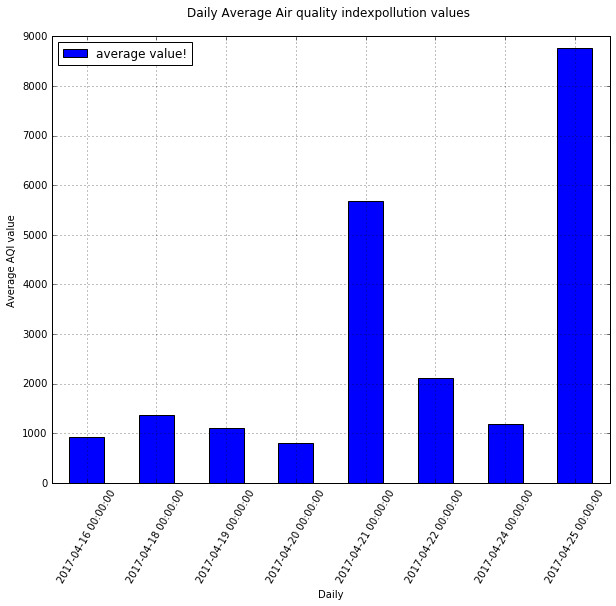

In [12]:
#print monthlys
fig, ax = plt.subplots(figsize=(10,8))
ax = monthlys.plot(kind='bar',label='average value!')
plt.legend(loc=2)
plt.xticks(rotation=60)
plt.grid()
plt.title('Daily Average Air quality indexpollution values \n')
plt.xlabel('Daily')
plt.ylabel('Average AQI value')
plt.show()

In [13]:
df.describe()

,Id,x,y,Concentration,Aqi,Aqi_log
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,530.500000,0.353887,32.579059,4293.545038,23.723493,2.579738
std,306.717297,0.013238,0.016463,6956.877045,28.064975,1.161612
min,0.000000,0.312431,32.471149,38.530000,0.250345,-1.384916
25%,265.250000,0.356499,32.582122,1020.585000,6.610620,1.888677
50%,530.500000,0.357663,32.584243,2098.600000,13.705102,2.617768
75%,795.750000,0.357703,32.584491,4582.317500,30.141323,3.405897
max,1061.000000,0.398082,32.606086,73912.430000,181.854678,5.203208


In [14]:
#correlation 
df.corr()

,Id,x,y,Concentration,Aqi,Aqi_log
Id,1.000000,-0.150513,-0.308439,-0.047372,0.032770,0.124960
x,-0.150513,1.000000,-0.380123,-0.111340,-0.147895,-0.178637
y,-0.308439,-0.380123,1.000000,-0.148765,-0.206092,-0.272160
Concentration,-0.047372,-0.111340,-0.148765,1.000000,0.959993,0.671198
Aqi,0.032770,-0.147895,-0.206092,0.959993,1.000000,0.798004
Aqi_log,0.124960,-0.178637,-0.272160,0.671198,0.798004,1.000000


 C:\Users\Kamanda\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning:No labelled objects found. Use label='...' kwarg on individual plots.


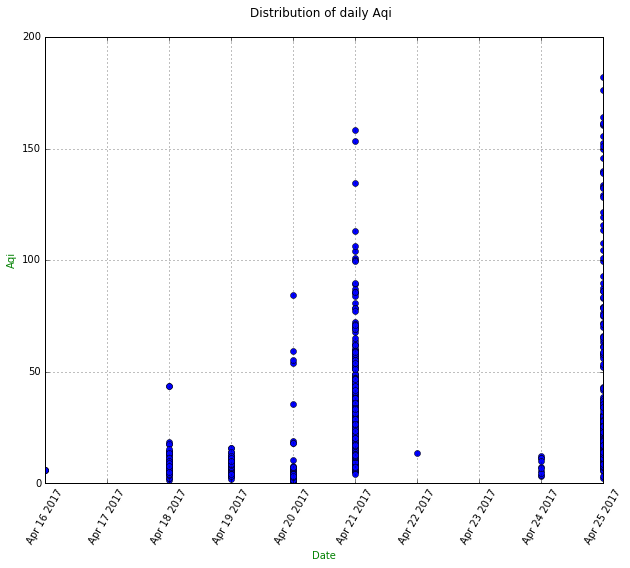

In [15]:
#fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(10,8))
plt.xticks(rotation=60)
plt.legend(loc=2)
ax1.plot(date, aqi, 'bo')
ax1.set_xlabel('Date', color='g')
ax1.set_ylabel('Aqi', color='g')
#plt.ylim((1150,1300))
ax1.set_title("Distribution of daily Aqi  \n")
plt.grid()
plt.grid(which ='minor',alpha = 0.5)
plt.show()

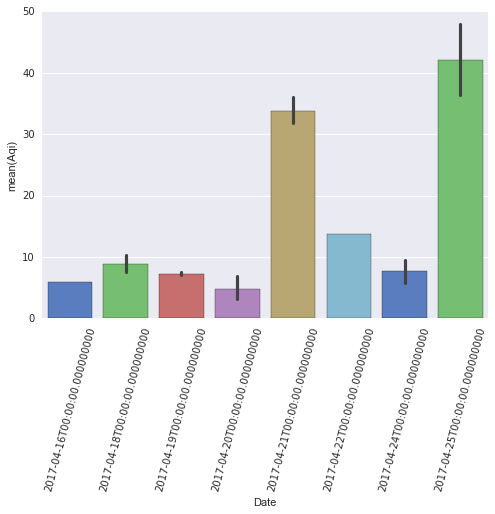

In [21]:
sns.set_style("darkgrid")
bar_plot = sns.barplot(x = date, y = aqi,
                      palette="muted")
plt.xticks(rotation=75)
plt.show()

Date    2017-04-25 00:00:00
Aqi                 181.855
dtype: object
                   Aqi
Date                  
2017-04-16    5.992425
2017-04-18   43.827193
2017-04-19   15.970552
2017-04-20   84.593271
2017-04-21  158.138027
2017-04-22   13.713744
2017-04-24   12.223370
2017-04-25  181.854678


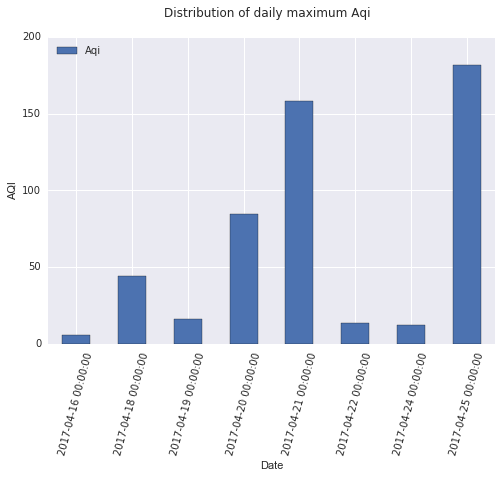

In [52]:
#print df.head(4)
#df['Date'].describe()
custom = df[['Date','Aqi']]
print custom.max()
custom_group=custom.groupby('Date')
custom_size=custom_group.max()
print custom_size
my_plot=custom_size.plot(kind='bar')
plt.xticks(rotation=75)
plt.legend(loc=2)
my_plot.set_title("Distribution of daily maximum Aqi  \n")
my_plot.set_ylabel('AQI')
#plt.show()




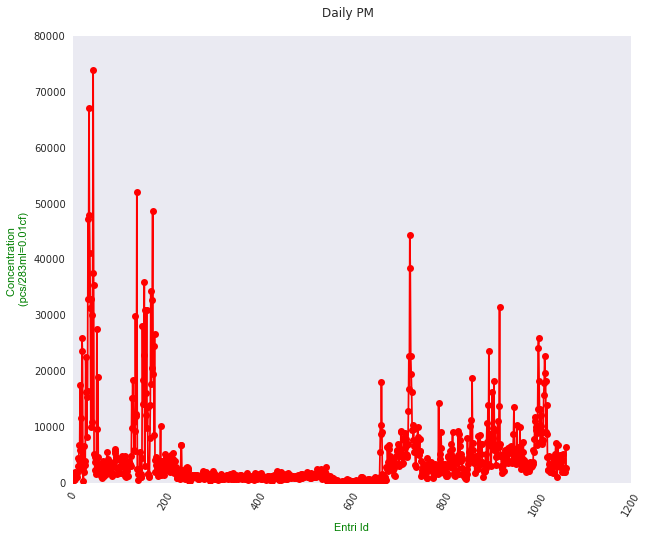

In [53]:
#fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(10,8))
#fig, ax2 = plt.subplots(figsize=(10,8))
plt.xticks(rotation=60)
plt.legend(loc=2)
#ax1.plot(ids, aqi, 'b*-')
ax1.set_xlabel('Entri Id', color='g')
ax1.set_ylabel('Concentration \n (pcs/283ml=0.01cf)', color='g')
#plt.ylim((1150,1300))
ax1.set_title("Daily PM  \n")
ax1.plot(ids, pm, 'ro-')
plt.grid()
plt.grid(which ='minor',alpha = 0.5)
plt.show()

In [54]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared



In [55]:

data1 = np.genfromtxt(con,  delimiter=',', skip_header=1)
#print data1
X = data1[:,[0]]
y = data1[:,[6]]
print X

[[  0.00000000e+00]
 [  1.00000000e+00]
 [  2.00000000e+00]
 ..., 
 [  1.05900000e+03]
 [  1.06000000e+03]
 [  1.06100000e+03]]


GPML kernel: 66**2 * RBF(length_scale=67) + 2.4**2 * RBF(length_scale=90) * ExpSineSquared(length_scale=1.3, periodicity=1) + 0.66**2 * RationalQuadratic(alpha=0.78, length_scale=1.2) + 0.18**2 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.0361)
Log-marginal-likelihood: -546396.727


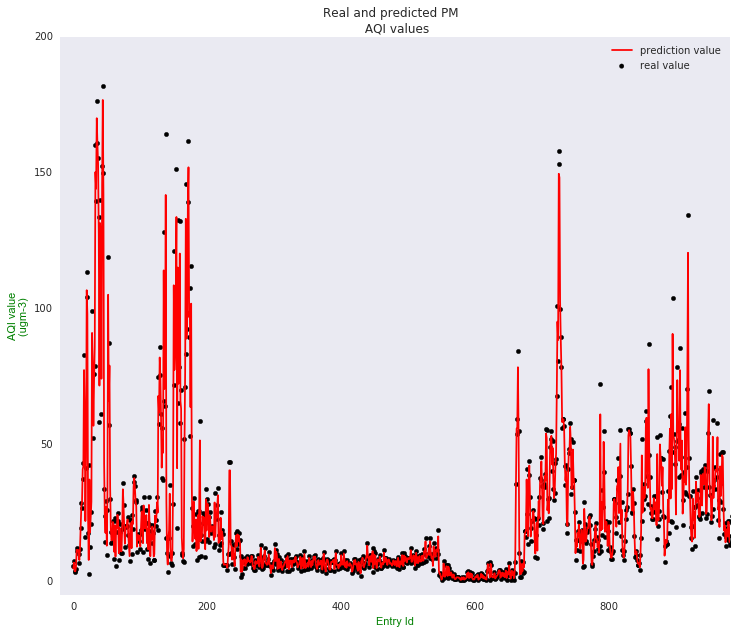

In [57]:
   
    # Kernel with parameters given in GPML book
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.19**2)  # noise terms
kernel_gpml = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0,
                              optimizer=None, normalize_y=True)
gp.fit(X, y)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

y_pred, sigma = gp.predict(X, return_std=True)

fig, ax1 = plt.subplots(figsize=(12,10))
plt.scatter(X, y, c='k', label = 'real value')
plt.plot(X, y_pred, 'r-', label='prediction value')
plt.xlim(-20, 980)
plt.ylim(-5,200)
ax1.set_xlabel('Entry Id', color='g')
ax1.set_ylabel(' AQI value \n (ugm-3) ', color='g')
ax1.set_title("Real and predicted PM  \n AQI values")
plt.grid()
plt.grid(which ='minor',alpha = 0.5)
plt.legend(loc=1)
plt.show()




GPML kernel: 66**2 * RBF(length_scale=67) + 2.4**2 * RBF(length_scale=90) * ExpSineSquared(length_scale=1.3, periodicity=1) + 0.66**2 * RationalQuadratic(alpha=0.78, length_scale=1.2) + 0.18**2 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.0361)
Log-marginal-likelihood: -546396.727


NameError: name 'y_std' is not defined

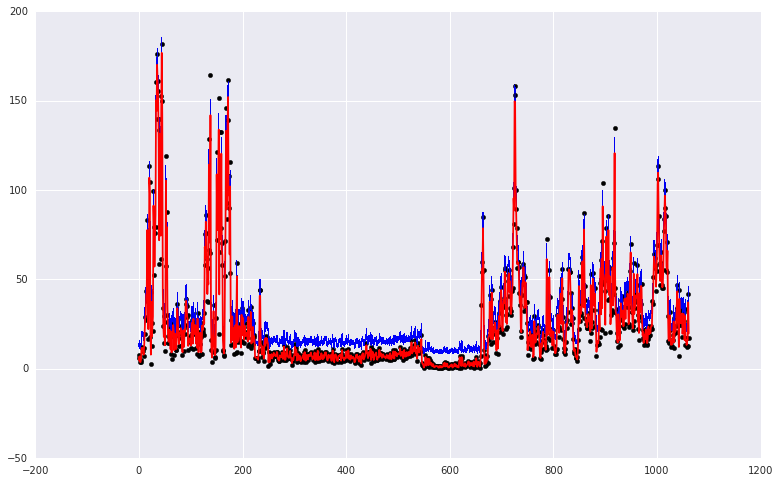

In [58]:

    # Kernel with parameters given in GPML book
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.19**2)  # noise terms
kernel_gpml = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0,
                              optimizer=None, normalize_y=True)
gp.fit(X, y)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

y_pred, sigma = gp.predict(X, return_std=True)


fig, ax1 = plt.subplots(figsize=(13,8))
plt.fill(np.concatenate([X, X[::-1]]),
         np.concatenate([y_pred + 30 * sigma,
                        (y_pred + 36 * sigma)[::-1]]),alpha=.5, fc='b', ec='None' , label='')

plt.scatter(X, y, c='k', label = 'real value')
plt.plot(X, y_pred, 'r', label='prediction value')
plt.plot(X,y_pred-y_std,label='')
plt.plot(X,y_pred+y_std,label='')
plt.grid()
plt.grid(which ='minor',alpha = 0.5)
plt.xlim(-20, 950)
plt.ylim(-5,200)
ax1.set_xlabel('Entry Id', color='g')
ax1.set_ylabel(' AQI \n ugm-3', color='g')
ax1.set_title("Real,predicted and confidence interval PM  \n AQI \n")
plt.legend(loc=1)
plt.show()




In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
X_train.shape

(711, 1)

In [61]:
X_test.shape

(351, 1)

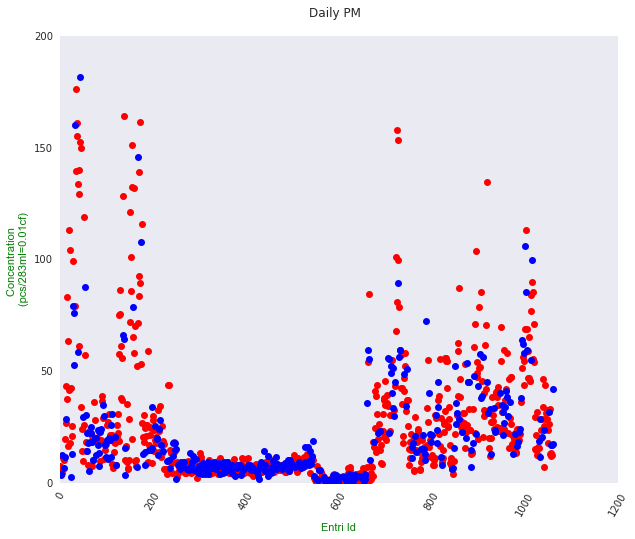

In [62]:
#fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(10,8))
#fig, ax2 = plt.subplots(figsize=(10,8))
plt.xticks(rotation=60)
plt.legend(loc=2)
#ax1.plot(ids, aqi, 'b*-')
ax1.set_xlabel('Entri Id', color='g')
ax1.set_ylabel('Concentration \n (pcs/283ml=0.01cf)', color='g')
#plt.ylim((1150,1300))
ax1.set_title("Daily PM  \n")
ax1.plot(X_train,y_train, 'ro',label = 'train value')
ax1.plot(X_test,y_test, 'bo')
plt.grid()
plt.grid(which ='minor',alpha = 0.5)
plt.show()

In [63]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df['Date'], df['Aqi'], test_size=0.33, random_state=42)

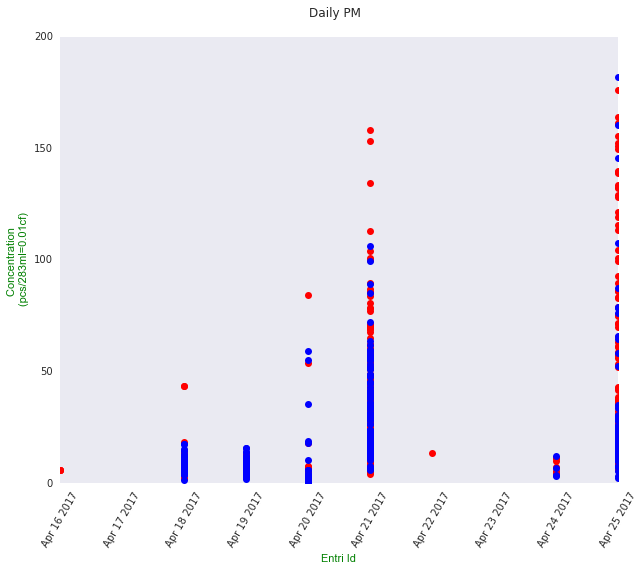

In [64]:
#fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(10,8))
#fig, ax2 = plt.subplots(figsize=(10,8))
plt.xticks(rotation=60)
plt.legend(loc=2)
#ax1.plot(ids, aqi, 'b*-')
ax1.set_xlabel('Entri Id', color='g')
ax1.set_ylabel('Concentration \n (pcs/283ml=0.01cf)', color='g')
#plt.ylim((1150,1300))
ax1.set_title("Daily PM  \n")
ax1.plot(X1_train,y1_train, 'ro',label = 'train value')
ax1.plot(X1_test,y1_test, 'bo')
plt.grid()
plt.grid(which ='minor',alpha = 0.5)
plt.show()

In [65]:
data1 = np.genfromtxt(con,  delimiter=',', skip_header=1)
#print data1
xx = data1[:,[0]]
yx = data1[:,[6]]


In [66]:
xx

array([[  0.00000000e+00],
       [  1.00000000e+00],
       [  2.00000000e+00],
       ..., 
       [  1.05900000e+03],
       [  1.06000000e+03],
       [  1.06100000e+03]])

Optimization restart 1/3, f = 4593.65113191
Optimization restart 2/3, f = 4593.65105904
Optimization restart 3/3, f = 4593.6511702

Name : GP regression
Objective : 4593.65105904
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  rbf.variance             |  902.818714405  |      +ve      |        
  rbf.lengthscale          |   5.7064199586  |      +ve      |        
  Gaussian_noise.variance  |  207.753492548  |      +ve      |        


 C:\Users\Kamanda\Anaconda2\lib\site-packages\matplotlib\figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


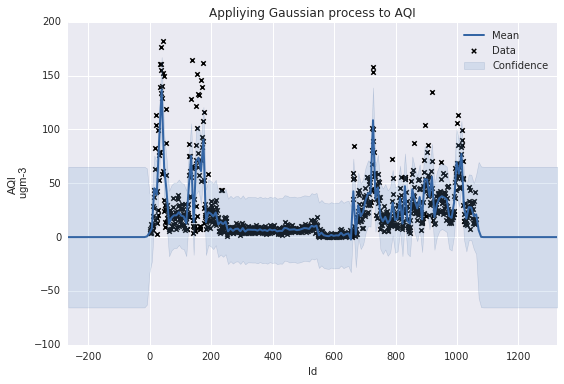

In [67]:
from matplotlib import pyplot as plt
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(xx,yx,kernel)
m.unconstrain('')
m.optimize()
m.optimize_restarts(num_restarts = 3)
print m
m.plot()
plt.title('Appliying Gaussian process to AQI')
plt.xlabel('Id')
plt.ylabel('AQI \n ugm-3')

In [129]:
#Saving the daily average values
#raw_data = {'Average':monthlys}
#save =pd.DataFrame(raw_data, columns = ['Average'])
#save.to_csv('C:\Users\Kamanda\Desktop\RECI\AVERAGECONCAT.csv')
#leading the average values

In [9]:
av='C:\Users\Kamanda\Desktop\RECI\AVERAGECONCAT.csv'
aver=pd.read_csv(av)

In [10]:
aver

,Id,TIMESTAMP,Average
0,16,4/16/2017,5.992425
1,18,4/18/2017,8.886842
2,19,4/19/2017,7.265082
3,20,4/20/2017,4.830578
4,21,4/21/2017,33.811016
5,22,4/22/2017,13.713744
6,24,4/24/2017,7.668781
7,25,4/25/2017,42.020070


In [11]:
data1 = np.genfromtxt(av,  delimiter=',', skip_header=1)
#print data1
xx1 = data1[:,[0]]
yx1 = data1[:,[2]]
print yx1

[[  5.99242499]
 [  8.88684196]
 [  7.26508245]
 [  4.83057808]
 [ 33.8110156 ]
 [ 13.71374398]
 [  7.66878099]
 [ 42.02006956]]


Optimization restart 1/3, f = 35.4967209597
Optimization restart 2/3, f = 33.5153139107
Optimization restart 3/3, f = 33.5153139084

Name : GP regression
Objective : 33.5153139084
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  rbf.variance             |  297.672393175  |      +ve      |        
  rbf.lengthscale          |   9.8057889858  |      +ve      |        
  Gaussian_noise.variance  |  166.728043795  |      +ve      |        


 C:\Users\Kamanda\Anaconda2\lib\site-packages\matplotlib\figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


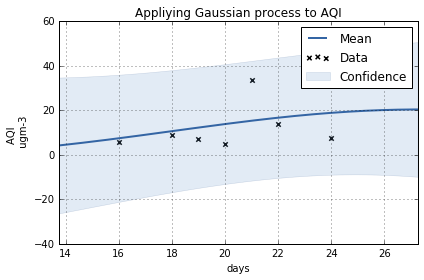

In [62]:
from matplotlib import pyplot as plt
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(xx1,yx1,kernel)
m.unconstrain('')
m.optimize()
m.optimize_restarts(num_restarts = 3)
print m
m.plot()
plt.grid()
plt.title('Appliying Gaussian process to AQI')
plt.xlabel('days')
plt.ylabel('AQI \n ugm-3')


Name : GP regression
Objective : 789.350011319
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


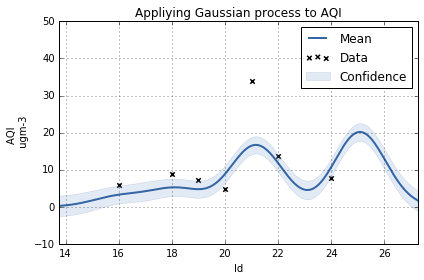

In [63]:
from matplotlib import pyplot as plt
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(xx1,yx1,kernel)

print m
m.plot()
plt.grid()
plt.title('Appliying Gaussian process to AQI')
plt.xlabel('Id')
plt.ylabel('AQI \n ugm-3')


Name : sparse_gp
Objective : 33.5153139086
Number of Parameters : 53
Number of Optimization Parameters : 53
Updates : True
Parameters:
  sparse_gp.               |          value  |  constraints  |  priors
  inducing_inputs          |        (50, 1)  |               |        
  rbf.variance             |  297.672177901  |      +ve      |        
  rbf.lengthscale          |  9.80576746196  |      +ve      |        
  Gaussian_noise.variance  |  166.729497664  |      +ve      |        


(-50, 150)

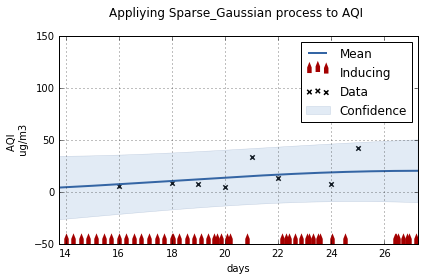

In [109]:
Z = np.hstack((np.linspace(14,28,50)))[:,None]
m = GPy.models.SparseGPRegression(xx1,yx1,Z=Z)
m.optimize()
m.plot()
#print m
print m
plt.grid()
plt.title('Appliying Sparse_Gaussian process to AQI \n')
plt.xlabel('days')
plt.ylabel('AQI \n ug/m3')
plt.ylim(-50,150)

In [12]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.datasets import fetch_mldata


# Kernel with parameters given in GPML book
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.19**2)  # noise terms
kernel_gpml = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0,
                              optimizer=None, normalize_y=True)
gp.fit(xx1, yx1)
print '------'
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

------
GPML kernel: 66**2 * RBF(length_scale=67) + 2.4**2 * RBF(length_scale=90) * ExpSineSquared(length_scale=1.3, periodicity=1) + 0.66**2 * RationalQuadratic(alpha=0.78, length_scale=1.2) + 0.18**2 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.0361)
Log-marginal-likelihood: -2887.780


In [41]:
# Kernel with optimized parameters
k1 = 50.0**2 * RBF(length_scale=50.0)  # long term smooth rising trend
k2 = 2.0**2 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-3, np.inf))  # noise terms
kernel = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel, alpha=0,
                              normalize_y=True)
gp.fit(xx1, yx1)

print("\nLearned kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))


Learned kernel: 0.00316**2 * RBF(length_scale=0.0024) + 0.00316**2 * RBF(length_scale=92.8) * ExpSineSquared(length_scale=1, periodicity=1) + 0.0632**2 * RationalQuadratic(alpha=1.83, length_scale=0.192) + 0.113**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=177)
Log-marginal-likelihood: -32.064


In [44]:
X_ = np.linspace(xx1.min(), xx1.max() + 20, 37)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)
#print y_pred

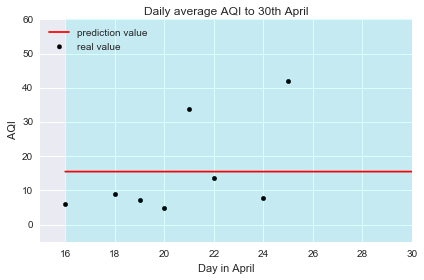

In [43]:
# Illustration
plt.scatter(xx1, yx1, c='k', label = 'real value')
plt.plot(X_, y_pred, 'r-', label='prediction value')
plt.fill(np.concatenate([X_, X_[::-1]]),
         np.concatenate([y_pred - 15.3 * sigma,
                        (y_pred + 15.3 * sigma)[::-1]]),
                         alpha=.005, fc='Cyan', ec='None',label="")

plt.xlim(X_.min(), X_.max())
plt.xlim(15, 30)
plt.ylim(-5,60)

plt.xlabel("Day in April")
plt.ylabel(r" AQI")
plt.title(r"Daily average AQI to 30th April")
plt.tight_layout()
plt.legend(loc=2)
#plt.grid()
plt.show()

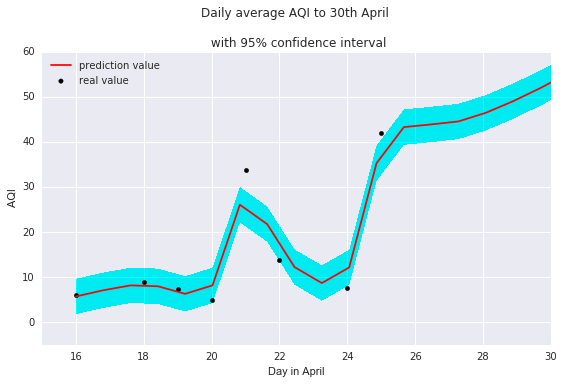

In [151]:
# Illustration
plt.scatter(xx1, yx1, c='k', label = 'real value')
plt.plot(X_, y_pred, 'r-',alpha=5, label='prediction value ')

plt.xlim(X_.min(), X_.max())
#myne="95 %Confidence Interval"
myne=''
#plt.plot(X_,y_pred+sigma*15,alpha=0.005, color='g',label=myne)
#plt.plot(X_,y_pred-sigma*15,alpha=0.005, color='g')

plt.fill(np.concatenate([X_, X_[::-1]]),
         np.concatenate([y_pred - 15.3 * sigma,
                        (y_pred + 15.3 * sigma)[::-1]]),
                         alpha=.005, fc='Cyan', ec='None',label=myne)

plt.xlim(15, 30)
plt.ylim(-5,60)

plt.xlabel("Day in April")
plt.ylabel(r" AQI")
plt.title("Daily average AQI to 30th April \n \n with 95% confidence interval")
plt.tight_layout()
plt.legend(loc=2)
#plt.grid()
plt.show()

In [162]:
dates1= pd.read_csv(av, parse_dates=['TIMESTAMP'] )
print dates1.head()

   Id  TIMESTAMP    Average
0  16 2017-04-16   5.992425
1  18 2017-04-18   8.886842
2  19 2017-04-19   7.265082
3  20 2017-04-20   4.830578
4  21 2017-04-21  33.811016


In [163]:
# Get all the columns from the dataframe.
columns = data.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Id","TIMESTAMP","Average"]]
# Store the variable we'll be predicting on.
target = "Average"
#come = "entry_id"
print target


Average


In [29]:
conKK = r'C:\Users\Kamanda\Desktop\RECI\Qnt.csv'

In [30]:
tre = pd.read_csv(conKK)

data1 = np.genfromtxt(conKK , delimiter=',', skip_header=1)
#print data1
xx = data1[:,[0]]
yx = data1[:,[1]]


In [31]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.datasets import fetch_mldata


# Kernel with parameters given in GPML book
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.19**2)  # noise terms
kernel_gpml = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0,
                              optimizer=None, normalize_y=True)
gp.fit(xx, yx)
print '------'
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

------
GPML kernel: 66**2 * RBF(length_scale=67) + 2.4**2 * RBF(length_scale=90) * ExpSineSquared(length_scale=1.3, periodicity=1) + 0.66**2 * RationalQuadratic(alpha=0.78, length_scale=1.2) + 0.18**2 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.0361)
Log-marginal-likelihood: -6285.586


In [46]:
# Kernel with optimized parameters
k1 = 50.0**2 * RBF(length_scale=50.0)  # long term smooth rising trend
k2 = 2.0**2 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-3, np.inf))  # noise terms
kernel = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel, alpha=0,
                              normalize_y=True)
gp.fit(xx, yx)

print("\nLearned kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))


Learned kernel: 12**2 * RBF(length_scale=8.34) + 0.00316**2 * RBF(length_scale=1.1e+03) * ExpSineSquared(length_scale=1, periodicity=1) + 0.00316**2 * RationalQuadratic(alpha=1.23e-05, length_scale=1e+05) + 0.00316**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=32.3)
Log-marginal-likelihood: -88.486


In [47]:
X_ = np.linspace(xx.min(), xx.max() + 20, 32)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)
print y_pred

[[ 26.82537809]
 [ 27.72673416]
 [ 29.27973708]
 [ 31.47324079]
 [ 34.22249307]
 [ 37.35961511]
 [ 40.63338118]
 [ 43.7230454 ]
 [ 46.2690415 ]
 [ 47.91953123]
 [ 48.386751  ]
 [ 47.50274066]
 [ 45.26186588]
 [ 41.83861498]
 [ 37.57357306]
 [ 32.92735498]
 [ 28.40993095]
 [ 24.4992061 ]
 [ 21.56600056]
 [ 19.82147799]
 [ 19.29758773]
 [ 19.86276401]
 [ 21.26627988]
 [ 23.19824364]
 [ 25.34994013]
 [ 27.46150712]
 [ 29.3494298 ]
 [ 30.91287864]
 [ 32.12326933]
 [ 33.00421122]
 [ 33.60911362]
 [ 34.00186359]]


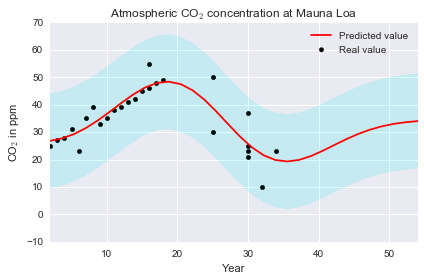

In [48]:
X_ = np.linspace(xx.min(), xx.max() + 20, 32)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.scatter(xx, yx, c='k',label = 'Real value')
plt.plot(X_, y_pred, c='r',label = 'Predicted value')
#plt.fill_between(X_, y_pred - y_std, y_pred + y_std,
 #            alpha=0.5, color='k')
    

    
#Avoid dublication of legend
  
    
#filling between the values with Cyan color
plt.fill(np.concatenate([X_, X_[::-1]]),
         np.concatenate([y_pred - 1.3 * sigma,
                        (y_pred + 1.3 * sigma)[::-1]]),
                         alpha=.005, fc='Cyan', ec='None')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.legend()
plt.show()


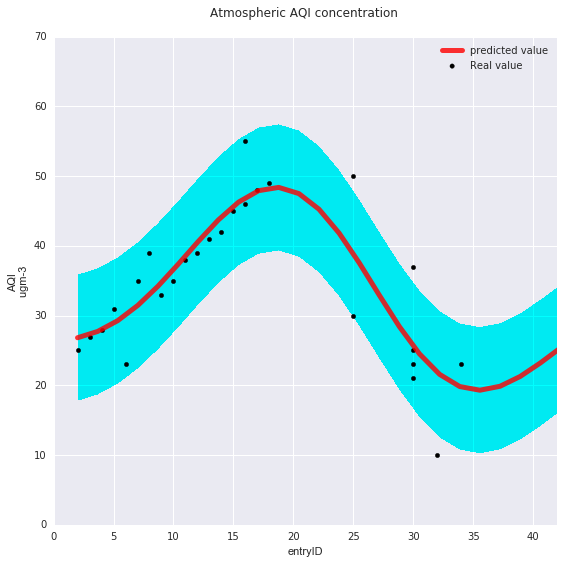

In [225]:
# Illustration
import scipy
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(xx, yx, c='k',label='Real value')
plt.plot(X_, y_pred,alpha=50,linewidth=5.0, c='r',label='predicted value')
c=X_+2
#plt.plot(c,y_pred)
z=X_ -2
#plt.plot(z,y_pred)

plt.fill(np.concatenate([X_, X_[::-1]]),
         np.concatenate([y_pred - 35.3 * sigma,
                        (y_pred + 35.3 * sigma)[::-1]]),
                         alpha=.002, fc='Cyan', ec='None')

plt.plot(X_,y_pred+y_std,alpha=0.0005, color='r')
plt.plot(X_,y_pred-y_std,alpha=0.0005, color='r')
plt.xlim(X_.min(), X_.max())
plt.xlabel("entryID")
plt.ylabel("AQI \n ugm-3 ")
plt.title("Atmospheric AQI concentration \n")
plt.xlim(0,42)
plt.legend()
#plt.grid()
#plt.ylim(-4,200)
plt.tight_layout()
plt.show()

Optimization restart 1/3, f = 90.2676425943
Optimization restart 2/3, f = 90.2676425942
Optimization restart 3/3, f = 90.2676426037

Name : GP regression
Objective : 90.2676425942
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  rbf.variance             |  721.245808462  |      +ve      |        
  rbf.lengthscale          |  14.5806569077  |      +ve      |        
  Gaussian_noise.variance  |  33.7901460217  |      +ve      |        


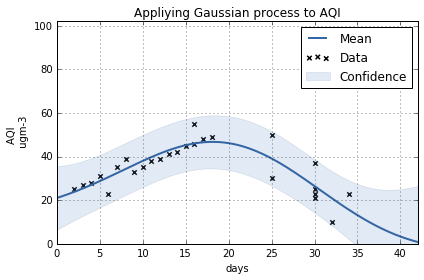

In [76]:
from matplotlib import pyplot as plt

kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(xx,yx,kernel)
m.unconstrain('')
m.optimize()
m.optimize_restarts(num_restarts = 3)
print m
m.plot()
plt.title('Appliying Gaussian process to AQI')
plt.xlabel('days')
plt.ylabel('AQI \n ugm-3')
plt.xlim(0,42)
plt.ylim(0,102)
plt.grid()

In [228]:
y_pred, sigma = gp.predict(xx, return_std=True)

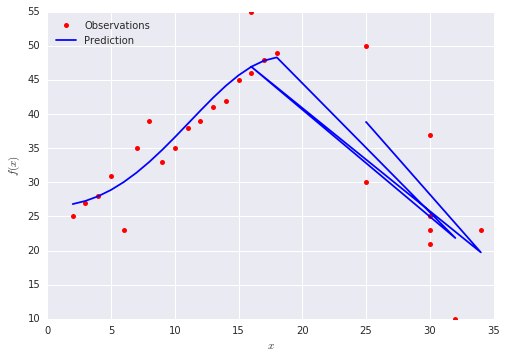

In [229]:
fig = plt.figure()
#plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(xx, yx, 'r.', markersize=10, label=u'Observations')
plt.plot(xx, y_pred, 'b-', label=u'Prediction')
'''
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_pred - 1.3 * sigma,
                        (y_pred + 3 * sigma)[::-1]]),
                         alpha=.005, fc='b', ec='None')'''
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.ylim(-10, 20)
plt.legend(loc='upper left')